In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

In [2]:
news_headlines = pd.read_csv("india-news-headlines.csv")
news_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3876552,20230630,city.goa,10 PIs move HC over thwarted seniority
3876553,20230630,city.goa,Govt notifies award in memory of Parrikar for ...
3876554,20230630,city.goa,After youth's death; PWD installs crash barrie...
3876555,20230630,city.goa,Authorities not acting against CRZ violations


In [3]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2001-01-02', end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
bse_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [5]:
bse_data.reset_index(inplace=True)
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [6]:
news_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876557 entries, 0 to 3876556
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 88.7+ MB


In [7]:
bse_data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [8]:
news_headlines.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [9]:
bse_data = bse_data.drop_duplicates()

bse_data['Date'] = pd.to_datetime(bse_data['Date']).dt.normalize()

bse_data = bse_data.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

bse_data.set_index('Date', inplace= True)

bse_data = bse_data.sort_index(ascending=True, axis=0)
bse_data

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0
...,...,...,...,...,...
2020-12-23,46444.179688,46072.300781,46513.320312,45899.101562,10500
2020-12-24,46973.539062,46743.488281,47053.398438,46539.019531,13700
2020-12-28,47353.750000,47153.589844,47406.718750,47148.238281,9600


In [10]:
news_headlines = news_headlines.drop_duplicates()

news_headlines['publish_date'] = news_headlines['publish_date'].astype(str)
news_headlines['publish_date'] = news_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
news_headlines['publish_date'] = pd.to_datetime(news_headlines['publish_date']).dt.normalize()

news_headlines = news_headlines.filter(['publish_date', 'headline_text'])

news_headlines = news_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

news_headlines.set_index('publish_date', inplace= True)

news_headlines = news_headlines.sort_index(ascending=True, axis=0)
news_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2023-06-26,"How can loneliness worsen your mental health?,..."
2023-06-27,Daily Horoscope; June 27; 2023: Read your dail...
2023-06-28,What is the 'courting hut' wedding ritual in A...


In [11]:
stock_data = pd.concat([bse_data, news_headlines], axis=1)

stock_data.dropna(axis=0, inplace=True)

stock_data


,Close,Open,High,Low,Volume,headline_text
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
...,...,...,...,...,...,...
2020-12-23,46444.179688,46072.300781,46513.320312,45899.101562,10500.0,"Sawmill in Makarpura GIDC gutted; none hurt,Ci..."
2020-12-24,46973.539062,46743.488281,47053.398438,46539.019531,13700.0,How to set the mood for sex during cold winter...
2020-12-28,47353.750000,47153.589844,47406.718750,47148.238281,9600.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,47613.078125,47466.621094,47714.550781,47361.898438,12800.0,Man recovers charred remains of 'thief' from h...


In [12]:
stock_data['compound'] = ''

stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...,
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think...",
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...,
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...,
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",


In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kushagramutreja/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')

print('Stop')

stock_data.head()

Start calculating sentiment scores:
Compound Done
Stop


,Close,Open,High,Low,Volume,headline_text,compound
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think...",0.6322
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...,0.6648
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...,0.9253
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638


In [15]:
stock_data.drop(['headline_text'], inplace=True, axis=1)
stock_data = stock_data[['Close', 'compound',  'Open', 'High', 'Low', 'Volume']]

stock_data.head()

,Close,compound,Open,High,Low,Volume
2001-01-02,4018.879883,-0.9621,3953.219971,4028.570068,3929.370117,0.0
2001-01-03,4060.020020,0.6322,3977.580078,4067.659912,3977.580078,0.0
2001-01-04,4115.370117,0.6648,4180.970215,4180.970215,4109.549805,0.0
2001-01-05,4183.729980,0.9253,4116.339844,4195.009766,4115.350098,0.0
2001-01-08,4120.430176,-0.9638,4164.759766,4206.720215,4101.529785,0.0


In [16]:
stock_data.rolling(7).mean().head(20)

,Close,compound,Open,High,Low,Volume
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,4095.911447,-0.175914,4094.170027,4143.089983,4052.832799,0.0
2001-01-23,4135.598598,0.094314,4140.542899,4184.972831,4101.904227,0.0
2001-01-24,4173.655727,-0.125129,4189.532854,4223.794294,4147.351353,0.0
2001-01-25,4204.348598,-0.360643,4210.514230,4246.702846,4170.801409,0.0


<Axes: >

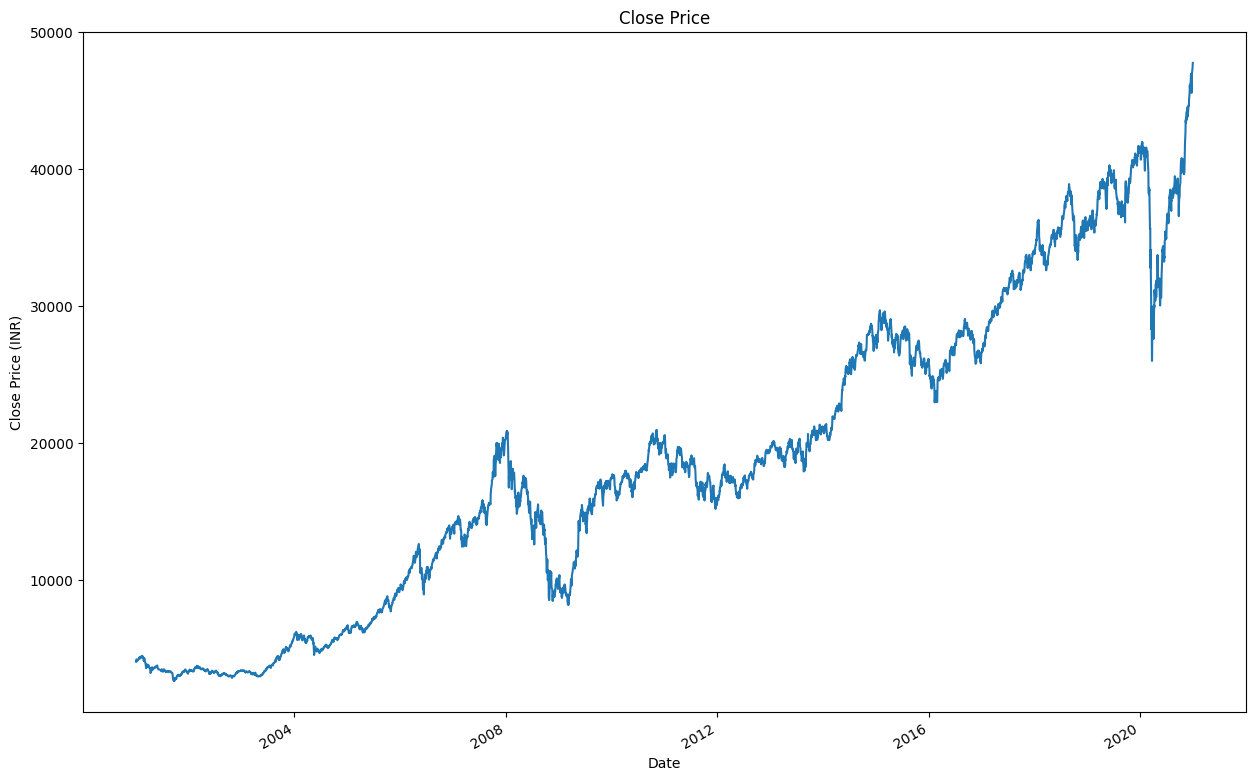

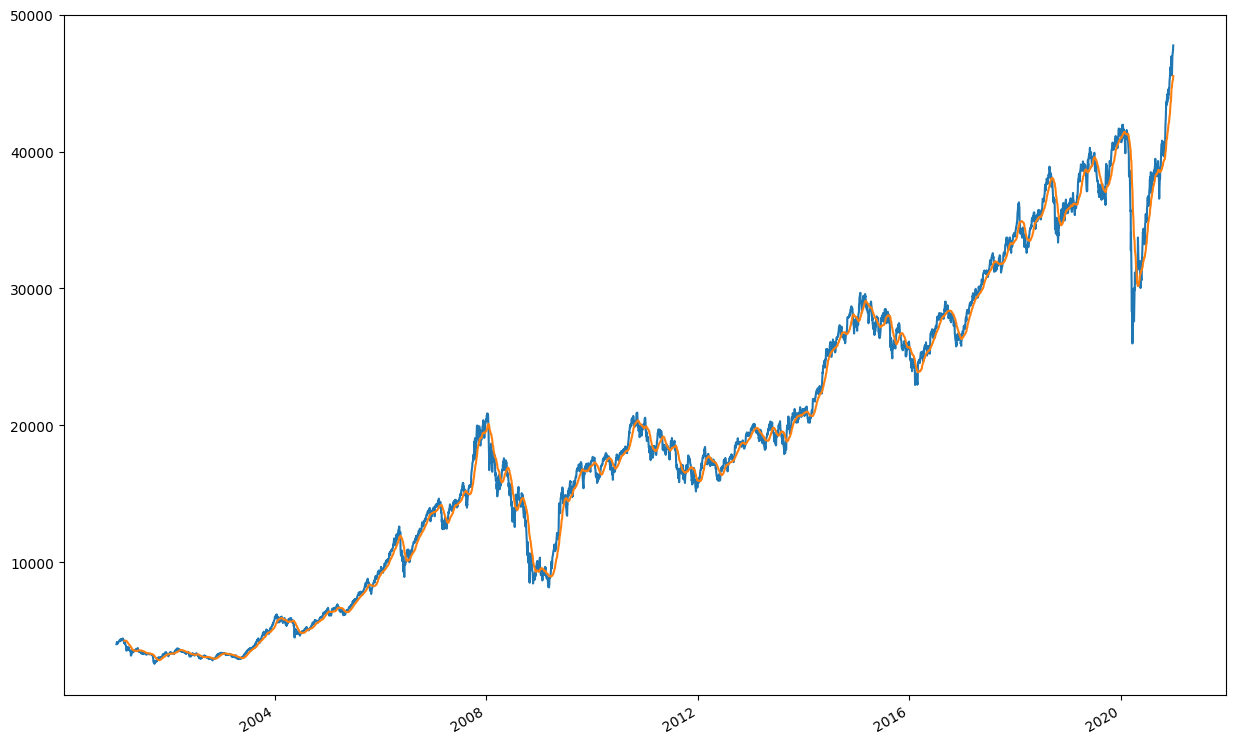

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

stock_data['Close'].plot()


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [18]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3916
Number of records in Test Data: 981


In [19]:
# predicting one step ahead
steps_to_predict = 1


close_price = stock_data.iloc[start:total_data,0] #close
compound = stock_data.iloc[start:total_data,1] #compound

open_price = stock_data.iloc[start:total_data,2] #open
high = stock_data.iloc[start:total_data,3] #high
low = stock_data.iloc[start:total_data,4] #low
volume = stock_data.iloc[start:total_data,5] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


2001-01-03     4060.020020
2001-01-04     4115.370117
2001-01-05     4183.729980
2001-01-08     4120.430176
2001-01-09     4125.310059
                  ...     
2020-12-23    46444.179688
2020-12-24    46973.539062
2020-12-28    47353.750000
2020-12-29    47613.078125
2020-12-30    47746.218750
Name: Close, Length: 4896, dtype: float64

In [20]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
2001-01-03,4060.020020,4115.370117,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,4183.729980,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,4120.430176,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,4125.310059,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,4047.639893,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
2001-01-10,4047.639893,4296.689941,-0.5719,0.9295,0.0,4151.580078,4155.859863,4035.439941
2001-01-23,4296.689941,4326.419922,0.9295,-0.9039,0.0,4277.830078,4321.750000,4272.870117
2001-01-24,4326.419922,4330.220215,-0.9039,-0.9838,0.0,4320.509766,4339.410156,4295.709961
2001-01-25,4330.220215,4234.569824,-0.9838,0.9697,0.0,4327.839844,4341.330078,4273.700195
2001-01-29,4234.569824,4372.040039,0.9697,-0.8580,0.0,4158.859863,4262.759766,4158.859863


In [21]:
#close price shifted set as the target var
y = data['close_price_shifted']
y

2001-01-03     4115.370117
2001-01-04     4183.729980
2001-01-05     4120.430176
2001-01-08     4125.310059
2001-01-09     4047.639893
                  ...     
2020-12-22    46444.179688
2020-12-23    46973.539062
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
Name: close_price_shifted, Length: 4895, dtype: float64

In [22]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
2001-01-03,4060.020020,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
...,...,...,...,...,...,...,...
2020-12-22,46006.691406,-0.9999,-0.9996,25100.0,45529.609375,46080.179688,45112.191406
2020-12-23,46444.179688,-0.9996,-0.9971,10500.0,46072.300781,46513.320312,45899.101562
2020-12-24,46973.539062,-0.9971,-0.9997,13700.0,46743.488281,47053.398438,46539.019531
2020-12-28,47353.750000,-0.9997,-0.9998,9600.0,47153.589844,47406.718750,47148.238281


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
	
# scaling the feature dataset
scaler_x = MinMaxScaler(feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.93513424,  0.6322    ,  0.6648    , ..., -0.93953849,
         -0.93848503, -0.93822641],
        [-0.93267494,  0.6648    ,  0.9253    , ..., -0.93046763,
         -0.93345259, -0.93233057],
        [-0.9296376 ,  0.9253    , -0.9638    , ..., -0.93335003,
         -0.93282905, -0.93207144],
        ...,
        [ 0.97158422, -0.9971    , -0.9997    , ...,  0.96774949,
          0.97063631,  0.96323728],
        [ 0.98847762, -0.9997    , -0.9998    , ...,  0.98603933,
          0.98632829,  0.99045457],
        [ 1.        , -0.9998    , -0.9998    , ...,  1.        ,
          1.        ,  1.        ]]),
 array([[-0.93287349],
        [-0.92984511],
        [-0.93264933],
        ...,
        [ 0.98261339],
        [ 0.99410179],
        [ 1.        ]]))

In [25]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in Training set X: (3916, 7) and y: (3916, 1)
Number of rows and columns in Test set X: (978, 7) and y: (978, 1)


In [26]:
#reshaping dataset
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))



print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)


Shape of Training set X: (3916, 7, 1)
Shape of Test set X: (978, 7, 1)


In [46]:
import numpy as np
from keras.models import Model
from keras.layers import Input, GRU, Dense, Dropout, Lambda, Multiply,Concatenate
from keras import backend as K
import tensorflow as tf
import xgboost as xgb
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam



class CombinedModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.gru1_model = self.build_gru_model()
        self.xgb1_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=600,max_depth=10,learning_rate=0.1,Gamma=0.01,RandomState=42,Min_child_weight=3,Subsample=0.8,Colsample_bytree=1,colsample_bylevel=1)

    def attention_3d_block(self,hidden_states):
     # hidden_states: (batch_size, time_steps, hidden_units)
    
     # Compute the attention scores using Dense layers
     attention_scores = Dense(64, activation='tanh')(hidden_states)  # Shape: (batch_size, time_steps, 64)
     attention_scores = Dense(1, activation='softmax')(attention_scores)  # Shape: (batch_size, time_steps, 1)

     # Reshape attention_scores to (batch_size, time_steps)
     attention_scores = Lambda(lambda x: tf.squeeze(x, axis=-1), output_shape=lambda s: (s[0], s[1]))(attention_scores)  # Shape: (batch_size, time_steps)

     # Apply attention scores by multiplying them with the hidden states
     attention_scores = Lambda(lambda x: tf.expand_dims(x, axis=-1), output_shape=lambda s: (s[0], s[1], 1))(attention_scores)  # Shape: (batch_size, time_steps, 1)
     weighted_states = Multiply()([hidden_states, attention_scores])  # Apply attention weights

     # Sum over the time steps to create a context vector
     context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1), output_shape=lambda s: (s[0], s[2]))(weighted_states)  # Shape: (batch_size, hidden_units)
    
     return context_vector

    def build_gru_model(self):
     inputs = Input(shape=self.input_shape)

     # Updated GRU layers with 64 hidden units
     gru1 = GRU(64, return_sequences=True, activation='tanh')(inputs)
     dropout1 = Dropout(0.1)(gru1)
    
     gru2 = GRU(64, return_sequences=True, activation='tanh')(dropout1)
     dropout2 = Dropout(0.1)(gru2)
    
     gru3 = GRU(64, activation='tanh', kernel_regularizer=l2(0.001))(dropout2)
     dropout3 = Dropout(0.1)(gru3)

     # Apply attention mechanism on the combined GRU output
     attention_output = self.attention_3d_block(dropout3)  # Shape: (None, 64)
     print("attention  output shape",attention_output.shape)
     # Final dense layer with 64 units and sigmoid activation
     gru_output = Dense(64)(attention_output)  # Shape: (None, 64)
     
     print("gru output shape",gru_output.shape)
     print("attention  output shape",attention_output.shape)
     # Create model
     model = Model(inputs=inputs, outputs=gru_output)
     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Updated learning rate
    
     return model

    
    def fit(self, X_train, y_train):
     early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
     y_train = np.array(y_train).flatten() 
     # Fit GRU model
     self.gru1_model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=1)

     # Get predictions from the GRU model
     gru_predictions = self.gru1_model.predict(X_train)
     print(gru_predictions.shape)

     X_train_combined = pd.concat([pd.DataFrame(X_train), pd.DataFrame(gru_predictions)], axis=1)
     print(X_train_combined.shape)
      
     # Fit XGBoost model with combined training data
     self.xgb1_model.fit(X_train_combined, y_train)


    def predict(self, X_test):
        gru_predictions=self.gru1_model.predict(X_test)
        print("gru prediction shape",gru_predictions.shape)
        plt.plot(y_test, label='Actual', color='blue')
        plt.plot(gru_predictions, label='Predicted', color='red')
        plt.legend()
        plt.title('Predicted vs Actual')
        plt.xlabel('Samples')
        plt.ylabel('Values')
        plt.show()
        X_test_combined = pd.concat([pd.DataFrame(X_test), pd.DataFrame(gru_predictions)], axis=1)
        print(X_test_combined.shape)
        # Predict using the XGBoost model
        xgb1_predictions = self.xgb1_model.predict(X_test_combined)

        
        return xgb1_predictions

In [47]:
# Define input shape based on your data
input_shape = (len(cols), 1)
print("Shape of y_test:", y_test.shape)
# Instantiate the combined model
combined_model = CombinedModel(input_shape)

# Fit the combined model
combined_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = combined_model.predict(X_test)


print("Shape of predictions:", xgb_predictions.shape)
y_test = y_test.ravel() 
print("Shape of y_test after flattening:", y_test.shape)
 # or y_test = y_test.flatten()
plt.figure(figsize=(17, 10))


# Calculate evaluation metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, xgb_predictions))
r2 = metrics.r2_score(y_test, xgb_predictions)
mae = metrics.mean_absolute_error(y_test, xgb_predictions)

# Print evaluation results
print('Root Mean Square Error (sklearn.metrics):', rmse)
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot predictions vs actual values
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual', color='blue')
plt.plot(xgb_predictions, label='Predicted', color='red')
plt.legend()
plt.title('Predicted vs Actual')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.show()

Shape of y_test: (978, 1)
attention  output shape (None, 64)
gru output shape (None, 1)
attention  output shape (None, 64)
Epoch 1/100


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_26" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 7, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score


# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store the RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# K-Fold Cross Validation Loop
for train_index, test_index in kf.split(x):
    # Splitting the data into train and test sets for this fold
    X_train_fold, X_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Reshape the datasets for the GRU model
    X_train_fold = X_train_fold.reshape(X_train_fold.shape + (1,))
    X_test_fold = X_test_fold.reshape(X_test_fold.shape + (1,))
    
    # Define the GRU model with attention mechanism
    gru_model = Model(inputs=inputs, outputs=gru_output)
    gru_model.compile(optimizer='adam', loss='mse')
    
    # Train the GRU model on the training data
    gru_model.fit(X_train_fold, y_train_fold, validation_split=0.2, batch_size=8, epochs=10, verbose=0)
    
    # Predict using the GRU model for this fold
    gru_predictions = gru_model.predict(X_test_fold)
    
    # Train XGBoost model using GRU output as features
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
    xgb_model.fit(gru_predictions, y_test_fold)
    
    # Predict using the XGBoost model
    xgb_predictions = xgb_model.predict(gru_predictions)
    
    # Calculate RMSE and R2 Score for this fold
    rmse = np.sqrt(mean_squared_error(y_test_fold, xgb_predictions))
    r2 = r2_score(y_test_fold, xgb_predictions)
    
    # Append the scores to the lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f'Fold RMSE: {rmse}')
    print(f'Fold R2 Score: {r2}')
    
# Calculate the average RMSE and R2 scores across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print(f'Average RMSE across {k} folds: {avg_rmse}')
print(f'Average R2 Score across {k} folds: {avg_r2}')


In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()